In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets

In [3]:
df=pd.read_csv("Project3-DataSet-Real estate.csv")

In [4]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df['X1 transaction date'] = pd.to_datetime(df['X1 transaction date'], format='%Y',exact=False)
df['X1 transaction date']=df['X1 transaction date'].dt.year

In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


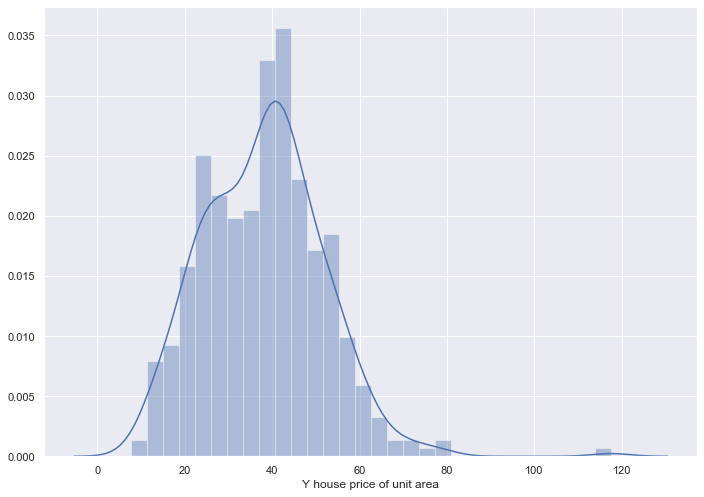

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Y house price of unit area'], bins = 30)
plt.show()

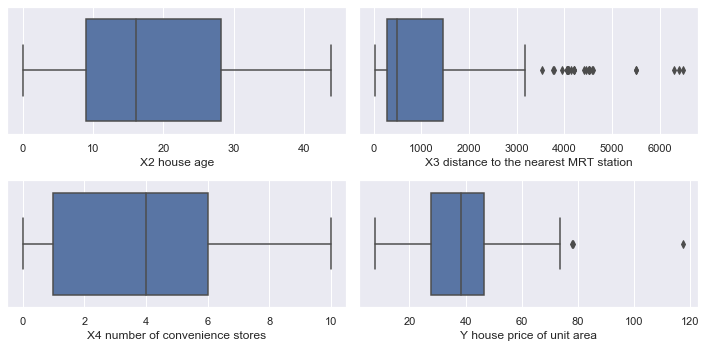

In [10]:
fig, axs = plt.subplots(2,2, figsize = (10,5))

plt2 = sns.boxplot(df['X2 house age'], ax = axs[0,0])
plt3 = sns.boxplot(df['X3 distance to the nearest MRT station'], ax = axs[0,1])
plt1 = sns.boxplot(df['X4 number of convenience stores'], ax = axs[1,0])
plt2 = sns.boxplot(df['Y house price of unit area'], ax = axs[1,1])
plt.tight_layout()

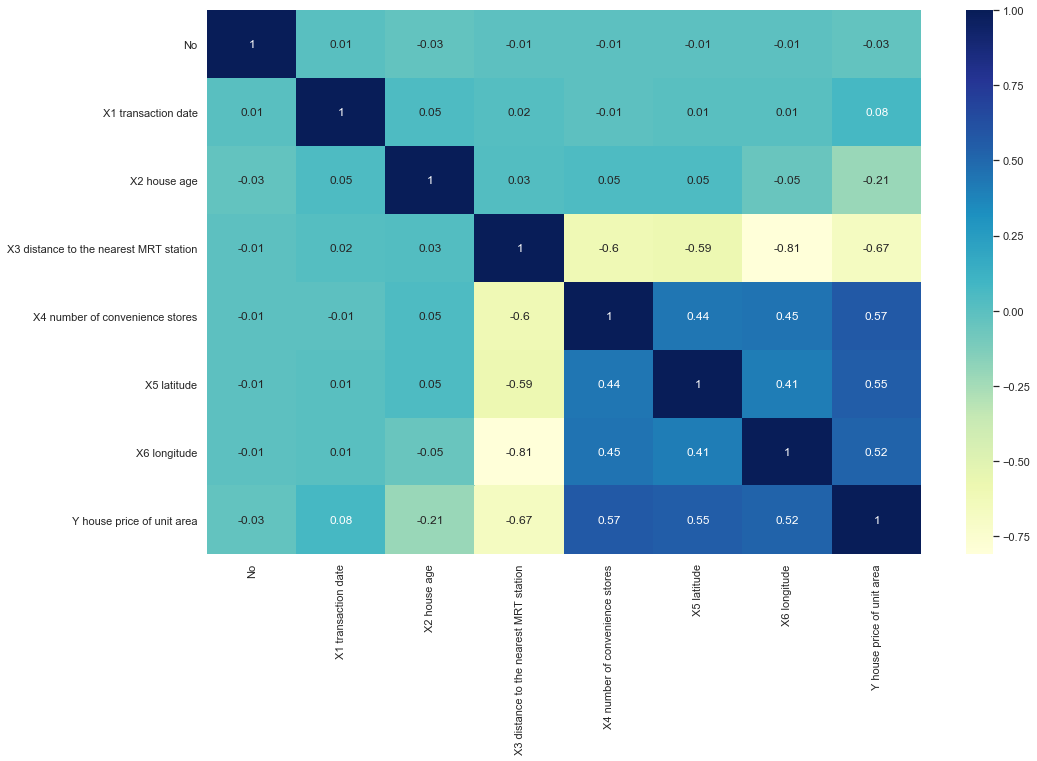

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr().round(2), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

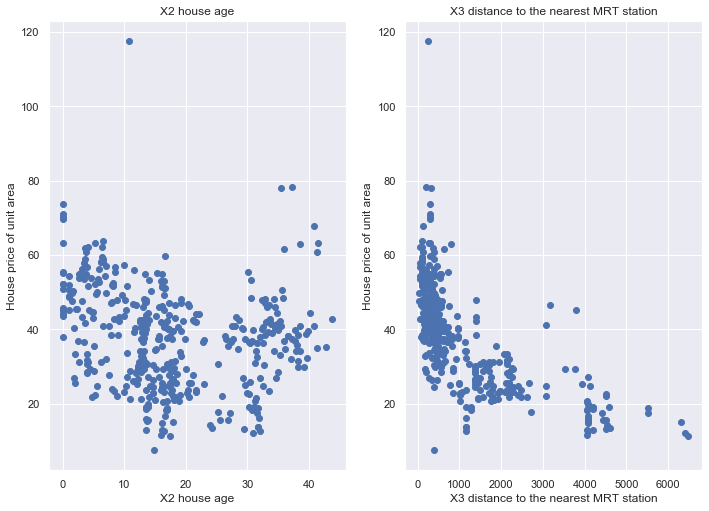

In [13]:
features = ['X2 house age', 'X3 distance to the nearest MRT station']
target = df['Y house price of unit area']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('House price of unit area')

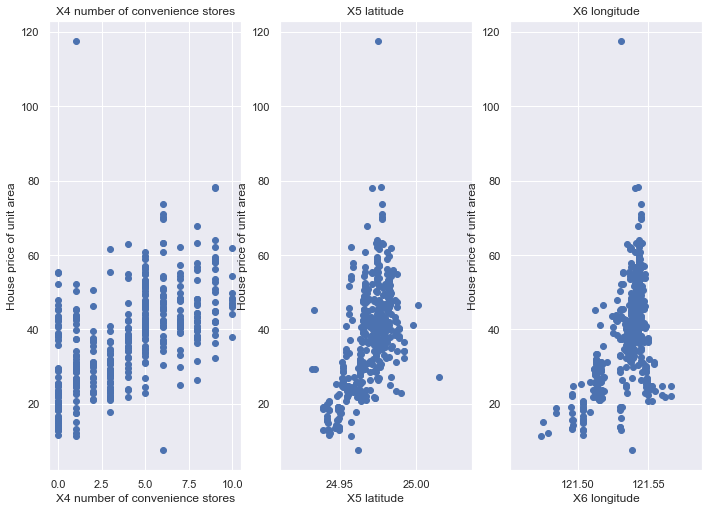

In [14]:
features = ['X4 number of convenience stores', 'X5 latitude','X6 longitude' ]
target = df['Y house price of unit area']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('House price of unit area')

The house price per unit area has Negative Correlation with:  

1- Distance to the nearest MRT station  
2- Aging of the house  

The house price per unit area has Positive Correlation with: 

1- No. of Convinience Stores  
2- Lattitude / Longitude of the house location

In [15]:
#np.c_ is to concatenate the LSTAT and RM columns
X = pd.DataFrame(np.c_[df['X2 house age'], df['X3 distance to the nearest MRT station'], df['X4 number of convenience stores'], df['X5 latitude'], df['X6 longitude']], columns = ['Aging','MRT Distance', 'Stores', 'Lat','Long'])
Y = df['Y house price of unit area']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(289, 5)
(125, 5)
(289,)
(125,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 9.444829511732392
R2 score is 0.5475313906998667


The model performance for testing set
--------------------------------------
RMSE is 7.584115304909602
R2 score is 0.6273501724917083


<function matplotlib.pyplot.show(*args, **kw)>

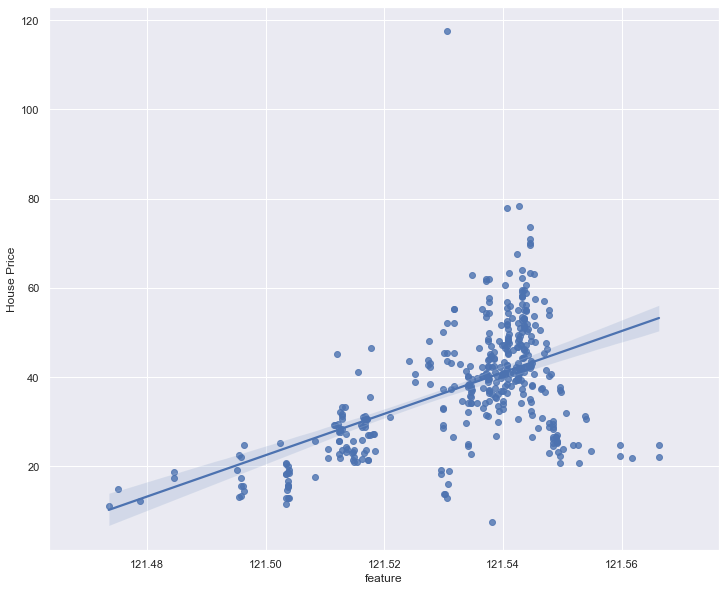

In [19]:
plt.figure(figsize=(12,10));
sns.regplot(x,y);
plt.xlabel('features')
plt.ylabel("House Price")
plt.show
